<font color=red>**Note:** This file has animations and they won't be visible in the pdf document. Matplotlib requires [ImageMagick](https://imagemagick.org/index.php) as backend to render animations. 

If you have a Mac and have homebrew installed, simply, <br /> <br />

brew install ghostscript <br />
brew install imagemagick

</font>

# SIRD Model

We divide the population $N$ into four *compartments* that vary as a function of time $t$, 

- $S(t)$ are those susceptible but not yet infected with the disease
- $I(t)$ is the number of infectious individuals 
- $R(t)$ are those individuals who have recovered from the disease and now have immunity to it
- $D(t)$ is the number of people who have died from the disease. 

## System of equations

$$\frac{\mathrm{d}S}{\mathrm{d}t} = -\frac{\beta IS}{N}$$

$$\frac{\mathrm{d}I}{\mathrm{d}t} = \frac{\beta IS}{N} -\gamma I -\mu I$$

$$\frac{\mathrm{d}R}{\mathrm{d}t} = \gamma I$$

$$\frac{\mathrm{d}D}{\mathrm{d}t} = \mu I$$

where $\beta, \gamma, \mu$ are the rates of infection, recovery, and mortality, respectively.

## Effect of Reproduction rate $R_0$ and mortality rate $\mu$

It can be understood as the ratio of people entering an infected state and people leaving the infected state. 

In [13]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

First let us define a class that can do our job. 

In [14]:
class SIRDModel:
    
    def __init__(self, beta=0.2, gamma=0.09, mu=0.01, days=160, val=0.01, var='\mu'):
        # Total population, N.
        self.N = 1000
        # Initial number of infected, recovered and dead individuals, I0, R0 and D0.
        self.I0, self.R0, self.D0 = 1, 0, 0
        # Everyone else, S0, is susceptible to infection initially.
        self.S0 = self.N - self.I0 - self.R0 - self.D0
        # Contact rate, beta, mean recovery rate, gamma, and mortality rate, mu (in 1/days).
        self.beta, self.gamma, self.mu = beta, gamma, mu
        # A grid of time points (in days)
        self.t = np.arange(days)
        self.val = val
        self.var = var
    
    def deriv(self, y, t, N, beta, gamma, mu):
        """The SIRD model differential equations"""
        S, I, R, D = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I - mu * I
        dRdt = gamma * I
        dDdt = mu * I
        return dSdt, dIdt, dRdt, dDdt
    
    def plot_sird(self, S, I, R, D):
        """Plot the data on four separate curves for S(t), 
        I(t), R(t) and D(t)""" 
        fig = plt.figure(figsize=[10,6], facecolor='w')
        ax = fig.add_subplot(111, axisbelow=True)
        ax.plot(self.t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
        ax.plot(self.t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
        ax.plot(self.t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
        ax.plot(self.t, D/1000, 'black', alpha=0.5, lw=2, label='Dead')
        ax.set_xlabel('Days')
        ax.set_ylabel('Number (1000s)')
        ax.set_ylim(0,1.2)
        ax.yaxis.set_tick_params(length=0)
        ax.xaxis.set_tick_params(length=0)
        ax.grid(b=True, which='major', c='w', lw=2, ls='-')
        legend = ax.legend()
        legend.get_frame().set_alpha(0.5)
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)
        plt.title(f'SIRD Model for ${self.var}={self.val}$', loc='center', fontsize=16, fontweight="bold")
        plt.show()
    
    def __main__(self):
        y0 = self.S0, self.I0, self.R0, self.D0
        ret = odeint(self.deriv, y0, self.t, args=(self.N, self.beta, self.gamma, self.mu))
        S, I, R, D = ret.T
        self.plot_sird(S, I, R, D)

For $R_0 = 2$ and $\mu = 1\%$. 

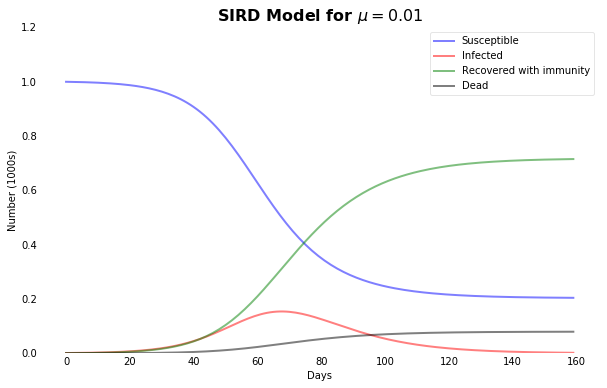

In [15]:
%matplotlib inline
SIRDModel(beta=0.2, gamma=0.09, mu=0.01, days=160, val=0.01, var='\mu').__main__()

## Tuning $\mu$

Now, we shall vary the parameters and see their effects. We consider $\mu$ in the range $\mu \in [0.1\%, 4\%]$

In [16]:
mu_val_range = np.round(np.arange(0.001,0.041,0.001),3)

In [17]:
from matplotlib import rcParams, animation, rc
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3

In [18]:
class SIRDModelAnimation:
    
    def __init__(self, beta=0.2, gamma=0.1, mu=0.01, days=160):
        # Total population, N.
        self.N = 1000
        # Initial number of infected, recovered and dead individuals, I0, R0 and D0.
        self.I0, self.R0, self.D0 = 1, 0, 0
        # Everyone else, S0, is susceptible to infection initially.
        self.S0 = self.N - self.I0 - self.R0 - self.D0
        # Contact rate, beta, mean recovery rate, gamma, and mortality rate, mu (in 1/days).
        self.beta, self.gamma, self.mu = beta, gamma, mu
        # A grid of time points (in days)
        self.t = np.arange(days)
    
    def deriv(self, y, t, N, beta, gamma, mu):
        """The SIRD model differential equations"""
        S, I, R, D = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I - mu * I
        dRdt = gamma * I
        dDdt = mu * I
        return dSdt, dIdt, dRdt, dDdt
    
    def __main__(self):
        y0 = self.S0, self.I0, self.R0, self.D0
        ret = odeint(self.deriv, y0, self.t, args=(self.N, self.beta, self.gamma, self.mu))
        S, I, R, D = ret.T
        return S, I, R, D, self.t

In [19]:
day=160
days=np.arange(day)
fig = plt.figure(figsize=[10,6], facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
line1, = ax.plot([], [], 'b', alpha=0.5, lw=2, label='Susceptible')
line2, = ax.plot([], [], 'r', alpha=0.5, lw=2, label='Infected')
line3, = ax.plot([], [], 'g', alpha=0.5, lw=2, label='Recovered with immunity')
line4, = ax.plot([], [], 'black', alpha=0.5, lw=2, label='Dead')
text = ax.text(days[20], 0.5, '', fontsize=12)
ax.set_xlabel('Days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1)
ax.set_xlim(0,day)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title(f'SIRD Model with varying $\mu$', loc='center', fontsize=16, fontweight="bold")
plt.close()

In [20]:
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    text.set_text('')
    return line1, line2, line3, line4, text, 

In [21]:
def animate_mu(i):
    mu = mu_val_range[i]
    S, I, R, D, t = SIRDModelAnimation(beta=0.2, gamma=0.1, mu=mu, days=day).__main__()
    line1.set_data(t, S/1000)
    line2.set_data(t, I/1000)
    line3.set_data(t, R/1000)
    line4.set_data(t, D/1000)
    text.set_text(f'$\mu={mu}$')

    return line1, line2, line3, line4, text, 

In [22]:
anim = animation.FuncAnimation(fig, animate_mu, init_func=init,
                               frames=len(mu_val_range), interval=100, blit=False)
anim

RuntimeError: Requested MovieWriter (ffmpeg) not available

As expected, increasing mortality rate $\mu$ increases the death count while the infected population respectively decreasing. 

In [11]:
# anim.save('varying_mu.gif', writer='imagemagick')

## Tuning $R_0$

Since $R_0$ depends on $\beta$, $\gamma$ and $\mu$, to vary it, we keep two variables fixed while we vary the other. We have already studied the effect of varying $\mu$ above. Here we tune $\beta$ and $\gamma$. We keep $R_0 $ in the range $R_0 \in [1.1, 6]$. 

### Varying $\beta$

In [12]:
mu = 0.02
gamma = 0.08
beta_val_range = np.round(np.arange(1.1, 6.1, 0.1)*gamma, 2)

In [13]:
plt.ioff()
fig = plt.figure(figsize=[10,6], facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
line1, = ax.plot([], [], 'b', alpha=0.5, lw=2, label='Susceptible')
line2, = ax.plot([], [], 'r', alpha=0.5, lw=2, label='Infected')
line3, = ax.plot([], [], 'g', alpha=0.5, lw=2, label='Recovered with immunity')
line4, = ax.plot([], [], 'black', alpha=0.5, lw=2, label='Dead')
text = ax.text(days[20], 0.5, '', fontsize=12)
ax.set_xlabel('Days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1)
ax.set_xlim(0,day)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title(f'SIRD Model with varying $\\beta$', loc='center', fontsize=16, fontweight="bold")
plt.close()

In [14]:
def animate_beta(i):
    beta = beta_val_range[i]
    S, I, R, D, t = SIRDModelAnimation(beta=beta, gamma=gamma, mu=mu, days=day).__main__()
    line1.set_data(t, S/1000)
    line2.set_data(t, I/1000)
    line3.set_data(t, R/1000)
    line4.set_data(t, D/1000)
    text.set_text(f'$\\beta = {beta}$')

    return line1, line2, line3, line4, text, 

<a id='section_id'></a>

In [15]:
anim = animation.FuncAnimation(fig, animate_beta, init_func=init,
                               frames=len(beta_val_range), interval=100, blit=False)
anim

### Varying $\gamma$

In [20]:
mu = 0.02
beta = 0.2
gamma_val_range = np.round(beta/np.arange(1.1, 6.1, 0.1) - mu, 2)
gamma_val_range = np.sort(np.unique(gamma_val_range))[::-1]

In [21]:
plt.ioff()
fig = plt.figure(figsize=[10,6], facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
line1, = ax.plot([], [], 'b', alpha=0.5, lw=2, label='Susceptible')
line2, = ax.plot([], [], 'r', alpha=0.5, lw=2, label='Infected')
line3, = ax.plot([], [], 'g', alpha=0.5, lw=2, label='Recovered with immunity')
line4, = ax.plot([], [], 'black', alpha=0.5, lw=2, label='Dead')
text = ax.text(days[20], 0.5, '', fontsize=12)
ax.set_xlabel('Days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1)
ax.set_xlim(0,day)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.title(f'SIRD Model with varying $\gamma$', loc='center', fontsize=16, fontweight="bold")
plt.close()

In [22]:
def animate_gamma(i):
    gamma = gamma_val_range[i]
    S, I, R, D, t = SIRDModelAnimation(beta=beta, gamma=gamma, mu=mu, days=day).__main__()
    line1.set_data(t, S/1000)
    line2.set_data(t, I/1000)
    line3.set_data(t, R/1000)
    line4.set_data(t, D/1000)
    text.set_text(f'$\gamma = {gamma}$')

    return line1, line2, line3, line4, text, 

In [23]:
anim = animation.FuncAnimation(fig, animate_gamma, init_func=init,
                               frames=len(gamma_val_range), interval=150, blit=False)
anim

From the above animations, we can see that increasing Reproduction Rate $R_0$, i.e., increasing infection rate $\beta$ and decreasing recovery rates $\gamma$, leads to higher number of infections and deaths, which makes sense. 

## Effect of Lockdowns

Let us study the effect of lockdowns by varying $\beta$. Let us consider the effect of a high $\beta$ (high infection rate and hence no lockdowns) and low $\beta$ (low infection rate and hence lockdown). 

### High $\beta$

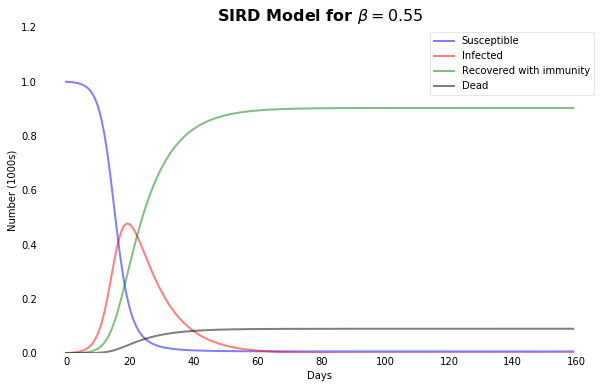

In [20]:
%matplotlib inline
SIRDModel(beta=0.55, gamma=0.1, mu=0.01, days=160, val=0.55, var='\\beta').__main__()

As one can see, a high infection rate leads to exponential rise in number of infections which reduces later because the population develops immunity. 

### Low $\beta$

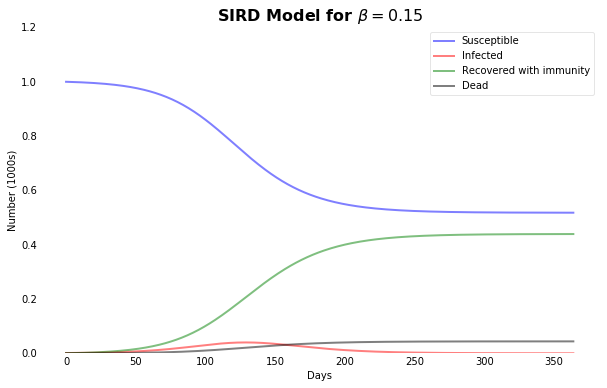

In [21]:
%matplotlib inline
SIRDModel(beta=0.15, gamma=0.1, mu=0.01, days=365, val=0.15, var='\\beta').__main__()

When lockdowns are imposed, a significant percentage of the population never catches the infection. The death count plateaus at a low number after some time, there are no new infections. We can see the asymptotic behaviour of imposing lockdowns ($t \rightarrow \infty$) because we have more days in the y-axis now (1 year). To see this effect live, refer to the [animation above](#section_id). 

# Principal Component Disasters

## Creating Labelled Surrogate Data

### Clearly Separable

We want to create four clearly separable blobs in 3D. We use the scikit-learn `make_blobs` function. 

In [22]:
from sklearn.datasets import make_blobs
from mpl_toolkits import mplot3d

Since we want 3 dimensions, `n_features`$=3$ and for four blobs, `centers`$=4$. 

In [23]:
X1, Y1 = make_blobs(n_features=3, centers=4, random_state=16)

Let us visualise our data. 

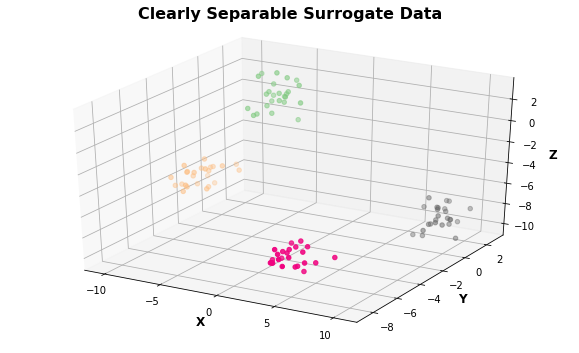

In [24]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection="3d")
ax.scatter3D(X1[:, 0], X1[:, 1], X1[:, 2], c=Y1, cmap='Accent')
plt.xlabel('X', fontsize=12, fontweight="bold")
plt.ylabel('Y', fontsize=12, fontweight="bold")
ax.set_zlabel('Z', fontsize=12, fontweight="bold")
plt.title('Clearly Separable Surrogate Data\n', loc='center', fontsize=16, fontweight="bold")
plt.show()

### Overlapping

For comparison, we create a dataset where the blobs are not clearly separable. 

In [25]:
from sklearn.datasets import make_classification, make_gaussian_quantiles

In [26]:
X2, Y2 = make_classification(n_features=3, n_redundant=1, n_informative=2,
                             n_clusters_per_class=1, n_classes=4, random_state=0)

In [27]:
# X2, Y2 = make_gaussian_quantiles(n_features=3, n_classes=4, random_state=42)

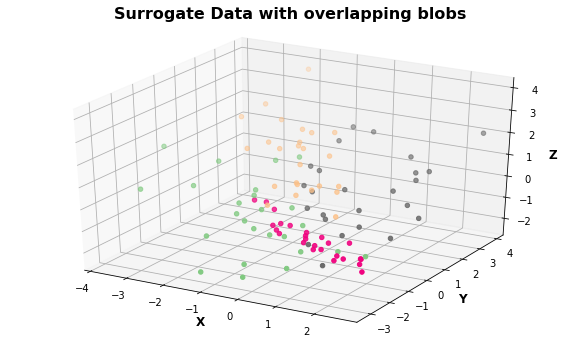

In [28]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection="3d")
ax.scatter3D(X2[:, 0], X2[:, 1], X2[:, 2], c=Y2, cmap='Accent')
plt.xlabel('X', fontsize=12, fontweight="bold")
plt.ylabel('Y', fontsize=12, fontweight="bold")
ax.set_zlabel('Z', fontsize=12, fontweight="bold")
plt.title('Surrogate Data with overlapping blobs\n', loc='center', fontsize=16, fontweight="bold")
plt.show()

Separating this data is going to be very hard. 

## Dimensionality Reduction with PCA

Now we try to reduce the dimensionality of the data with PCA. 

### Clearly Separable

First, we generate a plot of explained variance. 

In [29]:
from sklearn.decomposition import PCA

First we calculate the sum of explained ratios with increase in dimension. 

In [30]:
pca = PCA()
pca.fit(X1)
cumsum1 = np.cumsum(pca.explained_variance_ratio_)

Now, we plot number of dimensions w.r.t. the variance explained. 

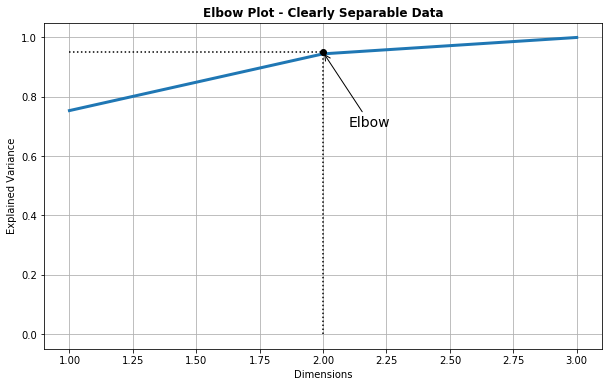

In [31]:
plt.figure(figsize=(10,6))
plt.plot([1, 2, 3], cumsum1, linewidth=3)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([2, 2], [0, 0.95], "k:")
plt.plot([1, 2], [0.95, 0.95], "k:")
plt.plot(2, 0.95, "ko")
plt.annotate("Elbow", xy=(2, 0.95), xytext=(2.1, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=14)
plt.grid(True)
plt.title('Elbow Plot - Clearly Separable Data', loc='center', fontsize=12, fontweight="bold")
plt.show()

We can explain $95\%$ of the variance with two dimensions. Plotting a 2D projection of the data will make it clearer. 

In [32]:
pca = PCA(n_components = 2)
X1_2D = pca.fit_transform(X1)

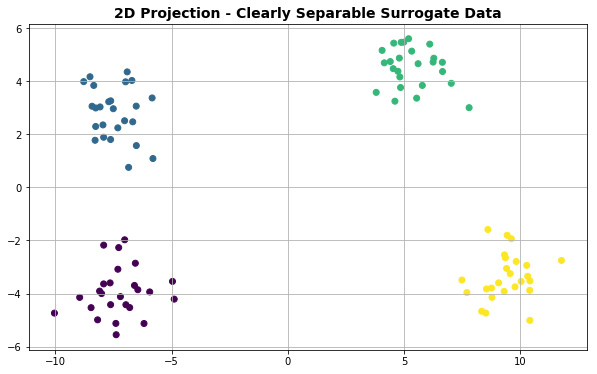

In [33]:
plt.figure(figsize=[10,6])
plt.scatter(X1_2D[:,0], X1_2D[:,1], c=Y1)
plt.title('2D Projection - Clearly Separable Surrogate Data', loc='center', fontsize=14, fontweight="bold")
plt.grid()
plt.show()

### Overlapping

Now we calculate the sum of explained variance for the overlapping data. 

In [34]:
pca = PCA()
pca.fit(X2)
cumsum2 = np.cumsum(pca.explained_variance_ratio_)

Now, we plot number of dimensions w.r.t. the variance explained. 

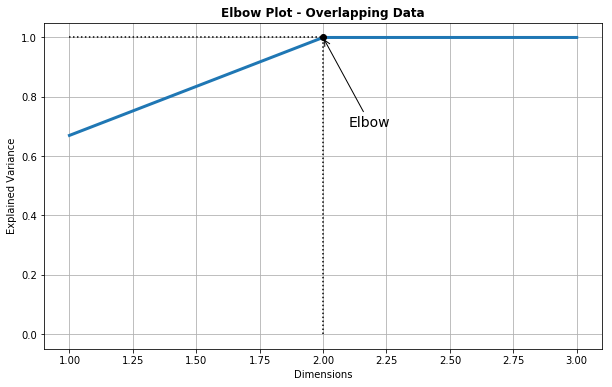

In [35]:
plt.figure(figsize=(10,6))
plt.plot([1, 2, 3], cumsum2, linewidth=3)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([2, 2], [0, 1], "k:")
plt.plot([1, 2], [1, 1], "k:")
plt.plot(2, 1, "ko")
plt.annotate("Elbow", xy=(2, 1), xytext=(2.1, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=14)
plt.grid(True)
plt.title('Elbow Plot - Overlapping Data', loc='center', fontsize=12, fontweight="bold")
plt.show()

For the overlapping data, all the variance can be explained by two dimensions. Below is the plot of the projection. 

In [36]:
pca = PCA(n_components = 2)
X2_2D = pca.fit_transform(X2)

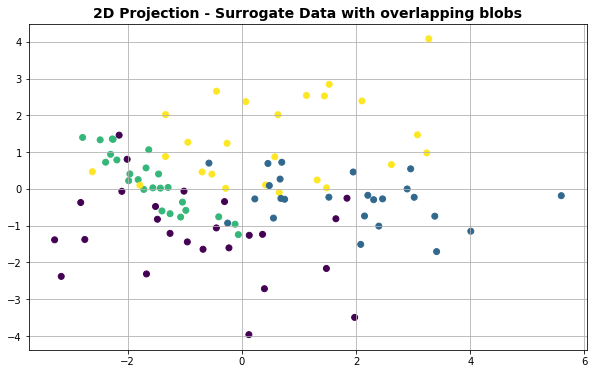

In [37]:
plt.figure(figsize=[10,6])
plt.scatter(X2_2D[:,0], X2_2D[:,1], c=Y2)
plt.title('2D Projection - Surrogate Data with overlapping blobs', loc='center', fontsize=14, fontweight="bold")
plt.grid()
plt.show()

## Logistic Regression

### Clearly Separable

We want to classify the points in a One-vs-All (OVR) fashion using logistic regression. 

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

First we create a train and test split. 

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

And reduce dimensionality using PCA, 

In [40]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Next we fit a Logistic Regression model, 

In [41]:
lr = LogisticRegression(multi_class='ovr', solver='liblinear')
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

We define a function to plot decision boundaries, 

In [42]:
def plot_decision_regions(X, y, classifier, resolution=0.01):
    # Does not work....always....Setup marker generator and color map: FIXED!
    markers = ('s', 'v', 'o', 'x') 
    colors = ('r', 'b', 'g', 'y')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # Z is the prediction of the class, given point in plane
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # Z=f(xx1,yy1), plot classes in plane using color map but opaque
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot data points, given labels
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.6, c=[cmap(idx)],
                    cmap='Accent', edgecolor='black',
                    marker=markers[idx], label=cl)

Let's see how well the model fits to the data. 

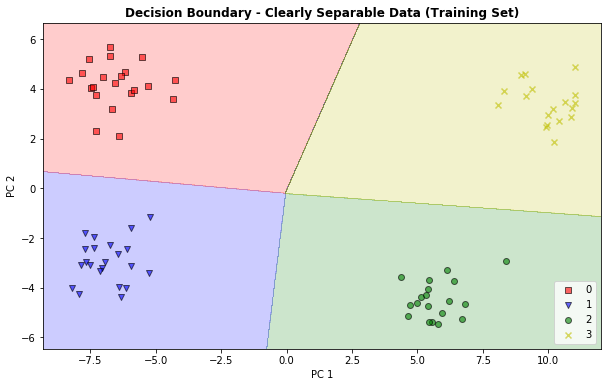

In [43]:
plt.figure(figsize=[10,6])
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.title('Decision Boundary - Clearly Separable Data (Training Set)', loc='center', fontsize=12, fontweight="bold")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

Very good! We have zero miscalssified examples. Let's see it's performance on the test set, 

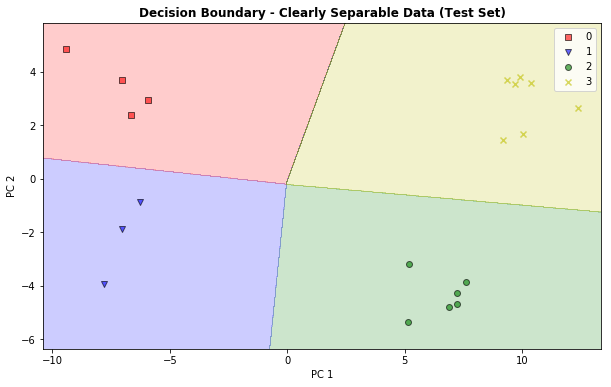

In [44]:
plt.figure(figsize=[10,6])
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.title('Decision Boundary - Clearly Separable Data (Test Set)', loc='center', fontsize=12, fontweight="bold")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

Perfect! Even though we reduced our data by one dimension using PCA, we still get perfect accuracy. 

### Overlapping

Repeating the same for the overlapping data, 

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

In [46]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [47]:
lr = LogisticRegression(multi_class='ovr', solver='liblinear')
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

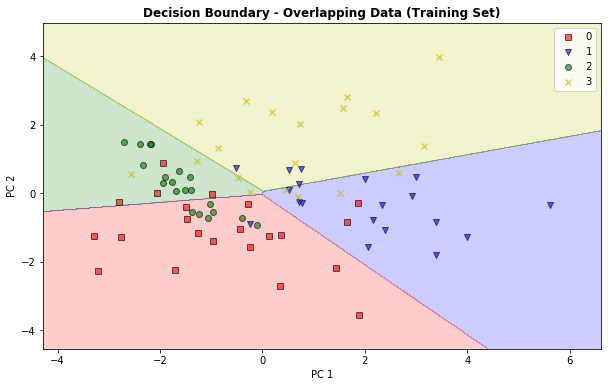

In [48]:
plt.figure(figsize=[10,6])
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.title('Decision Boundary - Overlapping Data (Training Set)', loc='center', fontsize=12, fontweight="bold")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

We see that the model does not fit the data very well. Inspecting test set performance, 

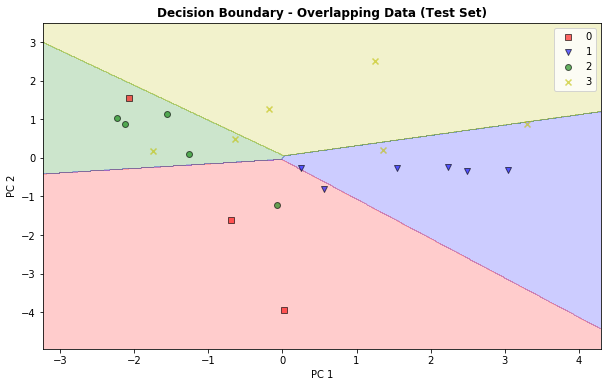

In [49]:
plt.figure(figsize=[10,6])
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.title('Decision Boundary - Overlapping Data (Test Set)', loc='center', fontsize=12, fontweight="bold")
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

We can see that we get plenty of misclassified points. We can see the accuracy score, 

In [50]:
y_pred = lr.predict(X_test_pca)
accuracy_score(y_test, y_pred)

0.65

Our accuracy is quite poor. Predicting on all three components will also not change this much, as two components explain the entire variance. 